In [1]:
import pandas as pd
df_1=pd.read_csv('/home/jolivera/Documents/CloudSkin/Time-Series-Library/dataset/partial_validation_dataset/preprocessed/inference_data_eb0e3eaa_b668_4ad6_bc10_2bb0eb7da259_20250805_161301.csv')
df_2=pd.read_csv('/home/jolivera/Documents/CloudSkin/Time-Series-Library/dataset/partial_validation_dataset/preprocessed/inference_data_fd7816db_7948_4602_af7a_1d51900792a7_20250805_161301.csv')
df=pd.concat([df_1,df_2], ignore_index=True).sort_values(by='date')


In [2]:
df.columns

Index(['date', 'cluster', 'pipelines_status_avg_fps',
       'pipelines_status_avg_pipeline_latency', 'node_cpu_usage',
       'node_mem_usage', 'pipelines_server_cpu_usage',
       'pipelines_server_mem_usage', 'number_pipelines',
       'pipelines_status_realtime_pipeline_latency'],
      dtype='object')

In [3]:
df.date.duplicated().any()

False

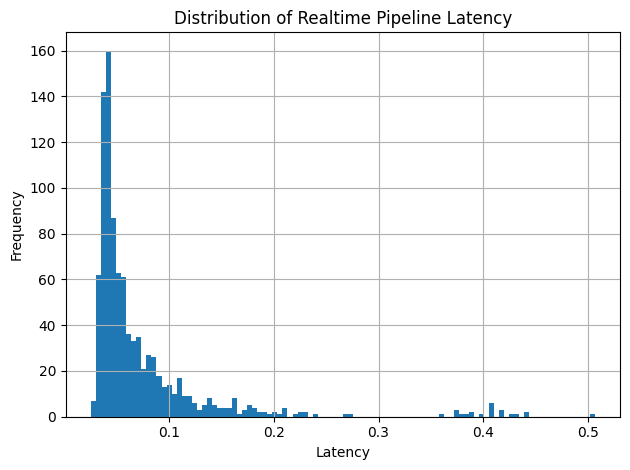

In [4]:
import matplotlib.pyplot as plt

# Plot histogram
df.pipelines_status_realtime_pipeline_latency.hist(bins=100)

# Add title and y-axis label
plt.title('Distribution of Realtime Pipeline Latency')
plt.ylabel('Frequency')
plt.xlabel('Latency')

# Show the plot
plt.tight_layout()
plt.show()


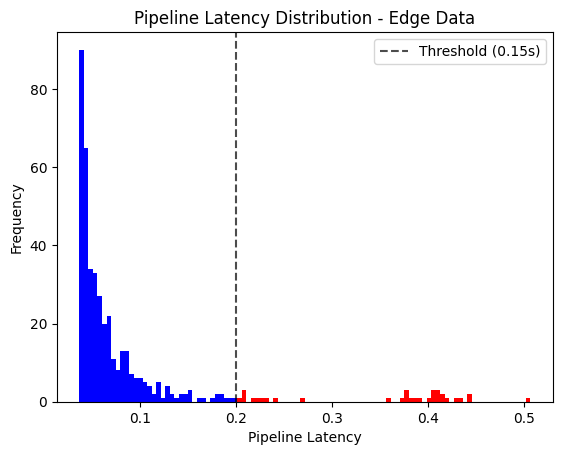

count    429.000000
mean       0.085657
std        0.086089
min        0.036827
25%        0.042761
50%        0.054980
75%        0.083565
max        0.506301
Name: pipelines_status_realtime_pipeline_latency, dtype: float64
0.2085311349232991


In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Create the histogram data
data = df[df['cluster']=='eb0e3eaa-b668-4ad6-bc10-2bb0eb7da259'].pipelines_status_realtime_pipeline_latency.dropna()
counts, bins, patches = plt.hist(data, bins=100)

# Color bars based on bin centers
for i, (patch, bin_left, bin_right) in enumerate(zip(patches, bins[:-1], bins[1:])):
    bin_center = (bin_left + bin_right) / 2
    if bin_center >= 0.2:
        patch.set_facecolor('red')  # Color for values >= 0.15
    else:
        patch.set_facecolor('blue')  # Color for values < 0.15

plt.axvline(x=0.2, color='black', linestyle='--', alpha=0.7, label='Threshold (0.15s)')
plt.xlabel('Pipeline Latency')
plt.ylabel('Frequency')
plt.title('Pipeline Latency Distribution - Edge Data')
plt.legend()
plt.show()

print(data.describe())
print(data.quantile(0.93))

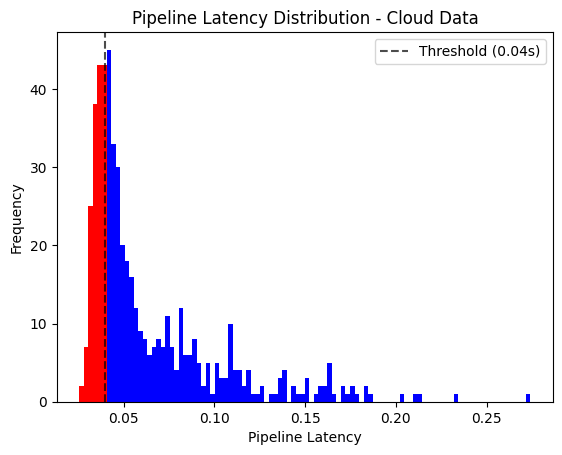

count    524.000000
mean       0.063924
std        0.037966
min        0.025679
25%        0.039128
50%        0.047352
75%        0.076365
max        0.274067
Name: pipelines_status_realtime_pipeline_latency, dtype: float64
0.04322638750076285


In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Create the histogram data
data = df[df['cluster']=='fd7816db-7948-4602-af7a-1d51900792a7'].pipelines_status_realtime_pipeline_latency.dropna()
counts, bins, patches = plt.hist(data, bins=100)

# Color bars based on bin centers
for i, (patch, bin_left, bin_right) in enumerate(zip(patches, bins[:-1], bins[1:])):
    bin_center = (bin_left + bin_right) / 2
    if bin_center <= 0.04:
        patch.set_facecolor('red')  # Color for values >= 0.15
    else:
        patch.set_facecolor('blue')  # Color for values < 0.15

plt.axvline(x=0.04, color='black', linestyle='--', alpha=0.7, label='Threshold (0.04s)')
plt.xlabel('Pipeline Latency')
plt.ylabel('Frequency')
plt.title('Pipeline Latency Distribution - Cloud Data')
plt.legend()
plt.show()

print(data.describe())
print(data.quantile(0.39))

In [7]:
df_results=pd.read_csv('/home/jolivera/Documents/CloudSkin/Time-Series-Library/dataset/partial_validation_dataset/validation-reactive-8h-concurrency-4-job-0_2025-07-10T083023_2025-07-10T163025_created_at_2025-07-10T163027_mlflow_results_cloudedge-migration-experiment-ci.csv',sep=';')
df_results=df_results.drop(columns=["cluster_1","qos_1"])
df_results.head()

,start_time,end_time,duration,run_id,status,cluster_0,max_cluster,analysed,qos_0,max_qos,max_idx,mlflow.user,mlflow.source.name,mlflow.source.type,mlflow.runName
0,1752136514,1752136538,24,262904b7d17745f284de0f7cec6fa840,FINISHED,eb0e3eaa-b668-4ad6-bc10-2bb0eb7da259,eb0e3eaa-b668-4ad6-bc10-2bb0eb7da259,True,0.052828,0.052828,0.0,root,/app/data-retrieval/data-retrieval.py,LOCAL,dataengineer
1,1752136810,1752136834,24,9709812edb784d2f970404d3de9f4ad1,FINISHED,eb0e3eaa-b668-4ad6-bc10-2bb0eb7da259,eb0e3eaa-b668-4ad6-bc10-2bb0eb7da259,True,0.053324,0.053324,0.0,root,/app/data-retrieval/data-retrieval.py,LOCAL,dataengineer
2,1752137108,1752137131,22,d8e44825db6141298cfb2cc1ade332da,FINISHED,eb0e3eaa-b668-4ad6-bc10-2bb0eb7da259,eb0e3eaa-b668-4ad6-bc10-2bb0eb7da259,True,0.048312,0.048312,0.0,root,/app/data-retrieval/data-retrieval.py,LOCAL,dataengineer
3,1752137413,1752137437,24,04f66f8742cf49629873cc49935cb7de,FINISHED,eb0e3eaa-b668-4ad6-bc10-2bb0eb7da259,eb0e3eaa-b668-4ad6-bc10-2bb0eb7da259,True,0.046710,0.046710,0.0,root,/app/data-retrieval/data-retrieval.py,LOCAL,dataengineer
4,1752137708,1752137733,24,98c6873e95b34af786d098bad8737574,FINISHED,eb0e3eaa-b668-4ad6-bc10-2bb0eb7da259,eb0e3eaa-b668-4ad6-bc10-2bb0eb7da259,True,0.051033,0.051033,0.0,root,/app/data-retrieval/data-retrieval.py,LOCAL,dataengineer


In [8]:
print(min(df_results["start_time"]))
print(max(df_results["start_time"]))

1752136514
1752165010


First Timestamp from metrics:
1752136200
Last Timestamp from metrics:
1752165000

First Timestamp from MLFlow:
1752136514
Last Timestamp from MLFlow:
1752165010

In [9]:
import pandas as pd
from datetime import timedelta

def add_actual_metrics(df_results, df_metrics):
    """
    Add actual mean and max latency columns to results dataframe.
    
    Parameters:
    - df_results: Results dataframe with 5-minute predictions
    - df_metrics: Metrics dataframe with 30-second actual data
    
    Returns:
    - df_results with two new columns added
    """
    
    # Make a copy to avoid modifying the original
    df_results_copy = df_results.copy()
    
    # Ensure timestamps are datetime
    df_results_copy['start_time'] = pd.to_datetime(df_results_copy['start_time'],unit='s')
    df_results_copy['end_time'] = pd.to_datetime(df_results_copy['end_time'],unit='s')
    df_metrics_copy = df_metrics.copy()
    df_metrics_copy['date'] = pd.to_datetime(df_metrics_copy['date'])  # Adjust column name if needed
    
    # Initialize new columns
    df_results_copy['real_future_values_5_min_mean'] = None
    df_results_copy['real_future_values_5_min_max'] = None
    
    # For each row in results
    for idx, row in df_results_copy.iterrows():
        # Round down to the nearest minute (10:55:14 becomes 10:55:00)
        start_time = row['start_time'].replace(second=0, microsecond=0)
        end_time = start_time + timedelta(minutes=5)
        
        # Filter metrics data for this 5-minute window
        window_data = df_metrics_copy[
            (df_metrics_copy['date'] >= start_time) & 
            (df_metrics_copy['date'] < end_time)
        ]
        
        # Calculate mean and max if data exists
        if not window_data.empty:
            latency_values = window_data['pipelines_status_realtime_pipeline_latency'].dropna()
            
            if not latency_values.empty:
                df_results_copy.loc[idx, 'real_future_values_5_min_mean'] = latency_values.mean()
                df_results_copy.loc[idx, 'real_future_values_5_min_max'] = latency_values.max()
    
    return df_results_copy

# Usage:
df_results_enhanced = add_actual_metrics(df_results, df)

Vale, la funcio d'adalt el que fa es agafarme un arxiu de validation de mlflow i el compara amb un arxiu de raw data i m'afegeix les metriques mean and max latency. Imagino que això va bé per comparar després amb un plot els valors reals dels predit.

In [10]:
df_results_enhanced

,start_time,end_time,duration,run_id,status,cluster_0,max_cluster,analysed,qos_0,max_qos,max_idx,mlflow.user,mlflow.source.name,mlflow.source.type,mlflow.runName,real_future_values_5_min_mean,real_future_values_5_min_max
0,2025-07-10 08:35:14,2025-07-10 08:35:38,24,262904b7d17745f284de0f7cec6fa840,FINISHED,eb0e3eaa-b668-4ad6-bc10-2bb0eb7da259,eb0e3eaa-b668-4ad6-bc10-2bb0eb7da259,True,0.052828,0.052828,0.0,root,/app/data-retrieval/data-retrieval.py,LOCAL,dataengineer,0.054551,0.077981
1,2025-07-10 08:40:10,2025-07-10 08:40:34,24,9709812edb784d2f970404d3de9f4ad1,FINISHED,eb0e3eaa-b668-4ad6-bc10-2bb0eb7da259,eb0e3eaa-b668-4ad6-bc10-2bb0eb7da259,True,0.053324,0.053324,0.0,root,/app/data-retrieval/data-retrieval.py,LOCAL,dataengineer,0.048446,0.076385
2,2025-07-10 08:45:08,2025-07-10 08:45:31,22,d8e44825db6141298cfb2cc1ade332da,FINISHED,eb0e3eaa-b668-4ad6-bc10-2bb0eb7da259,eb0e3eaa-b668-4ad6-bc10-2bb0eb7da259,True,0.048312,0.048312,0.0,root,/app/data-retrieval/data-retrieval.py,LOCAL,dataengineer,0.045068,0.058773
3,2025-07-10 08:50:13,2025-07-10 08:50:37,24,04f66f8742cf49629873cc49935cb7de,FINISHED,eb0e3eaa-b668-4ad6-bc10-2bb0eb7da259,eb0e3eaa-b668-4ad6-bc10-2bb0eb7da259,True,0.046710,0.046710,0.0,root,/app/data-retrieval/data-retrieval.py,LOCAL,dataengineer,0.051698,0.066051
4,2025-07-10 08:55:08,2025-07-10 08:55:33,24,98c6873e95b34af786d098bad8737574,FINISHED,eb0e3eaa-b668-4ad6-bc10-2bb0eb7da259,eb0e3eaa-b668-4ad6-bc10-2bb0eb7da259,True,0.051033,0.051033,0.0,root,/app/data-retrieval/data-retrieval.py,LOCAL,dataengineer,0.057277,0.0837
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2025-07-10 16:10:12,2025-07-10 16:10:36,23,f5a38f7e67344a0b8ecd4fa99918b610,FINISHED,fd7816db-7948-4602-af7a-1d51900792a7,fd7816db-7948-4602-af7a-1d51900792a7,True,0.072349,0.072349,0.0,root,/app/data-retrieval/data-retrieval.py,LOCAL,dataengineer,0.066097,0.158192
92,2025-07-10 16:15:08,2025-07-10 16:15:32,24,29baeae370ec4224841770d77b02ac37,FINISHED,fd7816db-7948-4602-af7a-1d51900792a7,fd7816db-7948-4602-af7a-1d51900792a7,True,0.067392,0.067392,0.0,root,/app/data-retrieval/data-retrieval.py,LOCAL,dataengineer,0.058708,0.094797
93,2025-07-10 16:20:18,2025-07-10 16:20:39,21,00cd3177bfa34ed39be066b9585064a5,FINISHED,fd7816db-7948-4602-af7a-1d51900792a7,fd7816db-7948-4602-af7a-1d51900792a7,True,0.057535,0.057535,0.0,root,/app/data-retrieval/data-retrieval.py,LOCAL,dataengineer,0.062029,0.166699
94,2025-07-10 16:25:12,2025-07-10 16:25:36,23,4852de966b34412bbce2bc88ac1bde71,FINISHED,fd7816db-7948-4602-af7a-1d51900792a7,fd7816db-7948-4602-af7a-1d51900792a7,True,0.061406,0.061406,0.0,root,/app/data-retrieval/data-retrieval.py,LOCAL,dataengineer,0.079531,0.163444


In [11]:
df_results

,start_time,end_time,duration,run_id,status,cluster_0,max_cluster,analysed,qos_0,max_qos,max_idx,mlflow.user,mlflow.source.name,mlflow.source.type,mlflow.runName
0,1752136514,1752136538,24,262904b7d17745f284de0f7cec6fa840,FINISHED,eb0e3eaa-b668-4ad6-bc10-2bb0eb7da259,eb0e3eaa-b668-4ad6-bc10-2bb0eb7da259,True,0.052828,0.052828,0.0,root,/app/data-retrieval/data-retrieval.py,LOCAL,dataengineer
1,1752136810,1752136834,24,9709812edb784d2f970404d3de9f4ad1,FINISHED,eb0e3eaa-b668-4ad6-bc10-2bb0eb7da259,eb0e3eaa-b668-4ad6-bc10-2bb0eb7da259,True,0.053324,0.053324,0.0,root,/app/data-retrieval/data-retrieval.py,LOCAL,dataengineer
2,1752137108,1752137131,22,d8e44825db6141298cfb2cc1ade332da,FINISHED,eb0e3eaa-b668-4ad6-bc10-2bb0eb7da259,eb0e3eaa-b668-4ad6-bc10-2bb0eb7da259,True,0.048312,0.048312,0.0,root,/app/data-retrieval/data-retrieval.py,LOCAL,dataengineer
3,1752137413,1752137437,24,04f66f8742cf49629873cc49935cb7de,FINISHED,eb0e3eaa-b668-4ad6-bc10-2bb0eb7da259,eb0e3eaa-b668-4ad6-bc10-2bb0eb7da259,True,0.046710,0.046710,0.0,root,/app/data-retrieval/data-retrieval.py,LOCAL,dataengineer
4,1752137708,1752137733,24,98c6873e95b34af786d098bad8737574,FINISHED,eb0e3eaa-b668-4ad6-bc10-2bb0eb7da259,eb0e3eaa-b668-4ad6-bc10-2bb0eb7da259,True,0.051033,0.051033,0.0,root,/app/data-retrieval/data-retrieval.py,LOCAL,dataengineer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,1752163812,1752163836,23,f5a38f7e67344a0b8ecd4fa99918b610,FINISHED,fd7816db-7948-4602-af7a-1d51900792a7,fd7816db-7948-4602-af7a-1d51900792a7,True,0.072349,0.072349,0.0,root,/app/data-retrieval/data-retrieval.py,LOCAL,dataengineer
92,1752164108,1752164132,24,29baeae370ec4224841770d77b02ac37,FINISHED,fd7816db-7948-4602-af7a-1d51900792a7,fd7816db-7948-4602-af7a-1d51900792a7,True,0.067392,0.067392,0.0,root,/app/data-retrieval/data-retrieval.py,LOCAL,dataengineer
93,1752164418,1752164439,21,00cd3177bfa34ed39be066b9585064a5,FINISHED,fd7816db-7948-4602-af7a-1d51900792a7,fd7816db-7948-4602-af7a-1d51900792a7,True,0.057535,0.057535,0.0,root,/app/data-retrieval/data-retrieval.py,LOCAL,dataengineer
94,1752164712,1752164736,23,4852de966b34412bbce2bc88ac1bde71,FINISHED,fd7816db-7948-4602-af7a-1d51900792a7,fd7816db-7948-4602-af7a-1d51900792a7,True,0.061406,0.061406,0.0,root,/app/data-retrieval/data-retrieval.py,LOCAL,dataengineer


In [12]:
df

,date,cluster,pipelines_status_avg_fps,pipelines_status_avg_pipeline_latency,node_cpu_usage,node_mem_usage,pipelines_server_cpu_usage,pipelines_server_mem_usage,number_pipelines,pipelines_status_realtime_pipeline_latency
0,2025-07-10 08:31:00,eb0e3eaa-b668-4ad6-bc10-2bb0eb7da259,15.779177,0.069999,3.227667,1.606131e+10,1.266700,5.543322e+08,1,0.084267
1,2025-07-10 08:31:30,eb0e3eaa-b668-4ad6-bc10-2bb0eb7da259,15.186757,0.064940,4.442333,1.601347e+10,2.472949,5.527716e+08,1,0.079295
2,2025-07-10 08:32:00,eb0e3eaa-b668-4ad6-bc10-2bb0eb7da259,15.091566,0.063104,4.167333,1.601285e+10,2.489619,5.483971e+08,1,0.050597
3,2025-07-10 08:32:30,eb0e3eaa-b668-4ad6-bc10-2bb0eb7da259,15.053849,0.062398,4.241000,1.596860e+10,2.473806,5.466399e+08,1,0.042150
4,2025-07-10 08:33:00,eb0e3eaa-b668-4ad6-bc10-2bb0eb7da259,15.025965,0.061904,4.188333,1.604098e+10,2.479241,5.500559e+08,1,0.051170
...,...,...,...,...,...,...,...,...,...,...
948,2025-07-10 16:28:00,fd7816db-7948-4602-af7a-1d51900792a7,15.002351,0.109521,7.447667,7.968023e+09,7.699309,1.817129e+09,4,0.108273
949,2025-07-10 16:28:30,fd7816db-7948-4602-af7a-1d51900792a7,15.002105,0.109540,7.361667,7.974719e+09,7.420983,1.813045e+09,4,0.046840
950,2025-07-10 16:29:00,fd7816db-7948-4602-af7a-1d51900792a7,15.001516,0.109444,7.181667,7.967711e+09,5.299835,1.814196e+09,4,0.046125
951,2025-07-10 16:29:30,fd7816db-7948-4602-af7a-1d51900792a7,15.000941,0.109755,7.407000,7.980818e+09,7.672646,1.817100e+09,4,0.048284


In [13]:
import pandas as pd
import os
from datetime import timedelta

def split_metrics_into_5min_datasets(df_metrics, df_results, save_path):
    """
    Split metrics dataframe into separate 5-minute datasets using the same windows as df_results.
    
    Parameters:
    - df_metrics: DataFrame with 30-second interval metrics
    - df_results: Results dataframe with prediction start_times (defines the 5-minute windows)
    - save_path: Directory path where to save the individual CSV files
    
    Returns:
    - List of created file paths
    """
    
    # Create output directory if it doesn't exist
    os.makedirs(save_path, exist_ok=True)
    
    # Make copies and ensure date columns are datetime
    df_metrics_copy = df_metrics.copy()
    df_metrics_copy['date'] = pd.to_datetime(df_metrics_copy['date'])

    df_results_copy = df_results.copy()
    df_results_copy['start_time'] = pd.to_datetime(df_results_copy['start_time'],unit='s')
    
    # Sort metrics by date
    df_metrics_copy = df_metrics_copy.sort_values('date').reset_index(drop=True)
    
    created_files = []
    
    # Use the exact windows from df_results
    for idx, row in df_results_copy.iterrows():
        # Round down to the nearest minute (same as in the previous function)
        end_time = row['start_time'].replace(second=0, microsecond=0)
        start_time = end_time - timedelta(minutes=5)
        
        # Filter data for this 5-minute window
        window_data = df_metrics_copy[
            (df_metrics_copy['date'] >= start_time) & 
            (df_metrics_copy['date'] < end_time)
        ].copy()
        
        # Only save if we have data
        if not window_data.empty:
            # Create filename with timestamp
            timestamp_str = start_time.strftime("%Y%m%d_%H%M")
            filename = f"inference_{timestamp_str}.csv"
            filepath = os.path.join(save_path, filename)
            
            # Save to CSV
            window_data.to_csv(filepath, index=False)
            created_files.append(filepath)
            
            print(f"Created: {filename} with {len(window_data)} rows "
                  f"(from {window_data['date'].min()} to {window_data['date'].max()})")
    
    print(f"\nTotal files created: {len(created_files)}")
    return created_files

def verify_5min_datasets(save_path):
    """
    Verify the created 5-minute datasets and DELETE files that don't have exactly 10 rows.
    
    Parameters:
    - save_path: Directory containing the CSV files
    """
    
    csv_files = [f for f in os.listdir(save_path) if f.endswith('.csv') and f.startswith('inference_')]
    csv_files.sort()
    
    print(f"Found {len(csv_files)} metric files")
    print("\nFile Summary:")
    print("-" * 60)
    
    deleted_files = []
    valid_files = []
    
    for filename in csv_files:
        filepath = os.path.join(save_path, filename)
        df = pd.read_csv(filepath)
        df['date'] = pd.to_datetime(df['date'])
        
        # Check if file has exactly 10 rows - DELETE IF NOT
        if len(df) != 10:
            print(f"{filename}: {len(df)} rows - DELETED (needs exactly 10 rows)")
            os.remove(filepath)  # DELETE THE FILE HERE
            deleted_files.append(filename)
        else:
            print(f"{filename}: {len(df)} rows, "
                  f"from {df['date'].min().strftime('%H:%M:%S')} "
                  f"to {df['date'].max().strftime('%H:%M:%S')} - VALID")
            valid_files.append(filename)
    
    print(f"\nSummary:")
    print(f"Valid files kept: {len(valid_files)}")
    print(f"Files deleted (incorrect row count): {len(deleted_files)}")
    
    if deleted_files:
        print(f"Deleted files: {deleted_files}")
    
    # Check a sample file if any valid files remain
    if valid_files:
        sample_file = os.path.join(save_path, valid_files[0])
        sample_df = pd.read_csv(sample_file)
        print(f"\nSample valid file columns: {list(sample_df.columns)}")
        print(f"Sample valid file shape: {sample_df.shape}")
    else:
        print("\nNo valid files remaining!")
    
    return valid_files, deleted_files

# Usage:
save_directory = "/home/jolivera/Documents/CloudSkin/Time-Series-Library/dataset/partial_validation_dataset/5_min_datasets"

# Split the metrics using the same 5-minute windows as df_results
created_files = split_metrics_into_5min_datasets(df, df_results, save_directory)

# Verify the created files and DELETE those without exactly 10 rows
verify_5min_datasets(save_directory)

Created: inference_20250710_0830.csv with 8 rows (from 2025-07-10 08:31:00 to 2025-07-10 08:34:30)
Created: inference_20250710_0835.csv with 10 rows (from 2025-07-10 08:35:00 to 2025-07-10 08:39:30)
Created: inference_20250710_0840.csv with 10 rows (from 2025-07-10 08:40:00 to 2025-07-10 08:44:30)
Created: inference_20250710_0845.csv with 10 rows (from 2025-07-10 08:45:00 to 2025-07-10 08:49:30)
Created: inference_20250710_0850.csv with 10 rows (from 2025-07-10 08:50:00 to 2025-07-10 08:54:30)
Created: inference_20250710_0855.csv with 10 rows (from 2025-07-10 08:55:00 to 2025-07-10 08:59:30)
Created: inference_20250710_0900.csv with 10 rows (from 2025-07-10 09:00:00 to 2025-07-10 09:04:30)
Created: inference_20250710_0905.csv with 10 rows (from 2025-07-10 09:05:00 to 2025-07-10 09:09:30)
Created: inference_20250710_0910.csv with 10 rows (from 2025-07-10 09:10:00 to 2025-07-10 09:14:30)
Created: inference_20250710_0915.csv with 10 rows (from 2025-07-10 09:15:00 to 2025-07-10 09:19:30)
C

Created: inference_20250710_1035.csv with 10 rows (from 2025-07-10 10:35:00 to 2025-07-10 10:39:30)
Created: inference_20250710_1040.csv with 10 rows (from 2025-07-10 10:40:00 to 2025-07-10 10:44:30)
Created: inference_20250710_1045.csv with 10 rows (from 2025-07-10 10:45:00 to 2025-07-10 10:49:30)
Created: inference_20250710_1050.csv with 10 rows (from 2025-07-10 10:50:00 to 2025-07-10 10:54:30)
Created: inference_20250710_1055.csv with 10 rows (from 2025-07-10 10:55:00 to 2025-07-10 10:59:30)
Created: inference_20250710_1100.csv with 10 rows (from 2025-07-10 11:00:00 to 2025-07-10 11:04:30)
Created: inference_20250710_1105.csv with 10 rows (from 2025-07-10 11:05:00 to 2025-07-10 11:09:30)
Created: inference_20250710_1110.csv with 10 rows (from 2025-07-10 11:10:00 to 2025-07-10 11:14:30)
Created: inference_20250710_1115.csv with 10 rows (from 2025-07-10 11:15:00 to 2025-07-10 11:19:30)
Created: inference_20250710_1120.csv with 10 rows (from 2025-07-10 11:20:00 to 2025-07-10 11:24:30)


(['inference_20250710_0835.csv',
  'inference_20250710_0840.csv',
  'inference_20250710_0845.csv',
  'inference_20250710_0850.csv',
  'inference_20250710_0855.csv',
  'inference_20250710_0900.csv',
  'inference_20250710_0905.csv',
  'inference_20250710_0910.csv',
  'inference_20250710_0915.csv',
  'inference_20250710_0920.csv',
  'inference_20250710_0925.csv',
  'inference_20250710_0935.csv',
  'inference_20250710_0940.csv',
  'inference_20250710_0945.csv',
  'inference_20250710_0950.csv',
  'inference_20250710_0955.csv',
  'inference_20250710_1000.csv',
  'inference_20250710_1010.csv',
  'inference_20250710_1015.csv',
  'inference_20250710_1020.csv',
  'inference_20250710_1025.csv',
  'inference_20250710_1030.csv',
  'inference_20250710_1035.csv',
  'inference_20250710_1040.csv',
  'inference_20250710_1045.csv',
  'inference_20250710_1050.csv',
  'inference_20250710_1055.csv',
  'inference_20250710_1100.csv',
  'inference_20250710_1105.csv',
  'inference_20250710_1110.csv',
  'inferen

### After creating all the files by  5-min windows, run the script with the path where you are storing the files. By doing that, we simulated what happened with 5 min pipelines.

In [14]:
import pandas as pd
import os
from datetime import timedelta

def add_predicted_metrics_to_results(df_results_enhanced, predictions_folder_path):
    """
    Add mean_predicted and max_predicted columns to df_results_enhanced by reading
    prediction CSV files and aggregating them by the same 5-minute windows.
    
    Parameters:
    - df_results_enhanced: DataFrame with existing results
    - predictions_folder_path: Path to folder containing prediction CSV files
    
    Returns:
    - df_results_enhanced with mean_predicted and max_predicted columns added
    """
    
    # Make a copy to avoid modifying original
    df_results_copy = df_results_enhanced.copy()
    df_results_copy['start_time'] = pd.to_datetime(df_results_copy['start_time'])
    
    # Get all prediction CSV files
    csv_files = [f for f in os.listdir(predictions_folder_path) 
                 if f.endswith('.csv')]
    
    # Read and combine all prediction files
    all_predictions = []
    for filename in csv_files:
        filepath = os.path.join(predictions_folder_path, filename)
        df_pred = pd.read_csv(filepath)
        df_pred['date'] = pd.to_datetime(df_pred['date'])
        all_predictions.append(df_pred)
    
    # Combine all predictions into one dataframe
    combined_predictions = pd.concat(all_predictions, ignore_index=True)
    combined_predictions = combined_predictions.sort_values('date').reset_index(drop=True)
    
    # Initialize new columns
    df_results_copy['mean_predicted'] = None
    df_results_copy['max_predicted'] = None
    
    # For each row in results, find corresponding predictions and aggregate
    for idx, row in df_results_copy.iterrows():
        # Round down to the nearest minute
        start_time = row['start_time'].replace(second=0, microsecond=0)
        end_time = start_time + timedelta(minutes=5)
        
        # Filter predictions for this 5-minute window
        window_predictions = combined_predictions[
            (combined_predictions['date'] >= start_time) & 
            (combined_predictions['date'] < end_time)
        ]
        
        # Calculate mean and max if predictions exist
        if not window_predictions.empty:
            predicted_values = window_predictions['pipelines_status_realtime_pipeline_latency'].dropna()
            
            if not predicted_values.empty:
                df_results_copy.loc[idx, 'mean_predicted'] = predicted_values.mean()
                df_results_copy.loc[idx, 'max_predicted'] = predicted_values.max()
    
    return df_results_copy

# Usage:
predictions_folder = "/home/jolivera/Documents/CloudSkin/Time-Series-Library/dataset/partial_validation_dataset/5_min_results"
df_results_final = add_predicted_metrics_to_results(df_results_enhanced, predictions_folder)

In [15]:
df_results_final

,start_time,end_time,duration,run_id,status,cluster_0,max_cluster,analysed,qos_0,max_qos,max_idx,mlflow.user,mlflow.source.name,mlflow.source.type,mlflow.runName,real_future_values_5_min_mean,real_future_values_5_min_max,mean_predicted,max_predicted
0,2025-07-10 08:35:14,2025-07-10 08:35:38,24,262904b7d17745f284de0f7cec6fa840,FINISHED,eb0e3eaa-b668-4ad6-bc10-2bb0eb7da259,eb0e3eaa-b668-4ad6-bc10-2bb0eb7da259,True,0.052828,0.052828,0.0,root,/app/data-retrieval/data-retrieval.py,LOCAL,dataengineer,0.054551,0.077981,None,None
1,2025-07-10 08:40:10,2025-07-10 08:40:34,24,9709812edb784d2f970404d3de9f4ad1,FINISHED,eb0e3eaa-b668-4ad6-bc10-2bb0eb7da259,eb0e3eaa-b668-4ad6-bc10-2bb0eb7da259,True,0.053324,0.053324,0.0,root,/app/data-retrieval/data-retrieval.py,LOCAL,dataengineer,0.048446,0.076385,0.371248,0.389398
2,2025-07-10 08:45:08,2025-07-10 08:45:31,22,d8e44825db6141298cfb2cc1ade332da,FINISHED,eb0e3eaa-b668-4ad6-bc10-2bb0eb7da259,eb0e3eaa-b668-4ad6-bc10-2bb0eb7da259,True,0.048312,0.048312,0.0,root,/app/data-retrieval/data-retrieval.py,LOCAL,dataengineer,0.045068,0.058773,0.37057,0.390295
3,2025-07-10 08:50:13,2025-07-10 08:50:37,24,04f66f8742cf49629873cc49935cb7de,FINISHED,eb0e3eaa-b668-4ad6-bc10-2bb0eb7da259,eb0e3eaa-b668-4ad6-bc10-2bb0eb7da259,True,0.046710,0.046710,0.0,root,/app/data-retrieval/data-retrieval.py,LOCAL,dataengineer,0.051698,0.066051,0.370926,0.389611
4,2025-07-10 08:55:08,2025-07-10 08:55:33,24,98c6873e95b34af786d098bad8737574,FINISHED,eb0e3eaa-b668-4ad6-bc10-2bb0eb7da259,eb0e3eaa-b668-4ad6-bc10-2bb0eb7da259,True,0.051033,0.051033,0.0,root,/app/data-retrieval/data-retrieval.py,LOCAL,dataengineer,0.057277,0.0837,0.372339,0.38588
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2025-07-10 16:10:12,2025-07-10 16:10:36,23,f5a38f7e67344a0b8ecd4fa99918b610,FINISHED,fd7816db-7948-4602-af7a-1d51900792a7,fd7816db-7948-4602-af7a-1d51900792a7,True,0.072349,0.072349,0.0,root,/app/data-retrieval/data-retrieval.py,LOCAL,dataengineer,0.066097,0.158192,0.368175,0.388432
92,2025-07-10 16:15:08,2025-07-10 16:15:32,24,29baeae370ec4224841770d77b02ac37,FINISHED,fd7816db-7948-4602-af7a-1d51900792a7,fd7816db-7948-4602-af7a-1d51900792a7,True,0.067392,0.067392,0.0,root,/app/data-retrieval/data-retrieval.py,LOCAL,dataengineer,0.058708,0.094797,0.365586,0.384555
93,2025-07-10 16:20:18,2025-07-10 16:20:39,21,00cd3177bfa34ed39be066b9585064a5,FINISHED,fd7816db-7948-4602-af7a-1d51900792a7,fd7816db-7948-4602-af7a-1d51900792a7,True,0.057535,0.057535,0.0,root,/app/data-retrieval/data-retrieval.py,LOCAL,dataengineer,0.062029,0.166699,0.366082,0.384295
94,2025-07-10 16:25:12,2025-07-10 16:25:36,23,4852de966b34412bbce2bc88ac1bde71,FINISHED,fd7816db-7948-4602-af7a-1d51900792a7,fd7816db-7948-4602-af7a-1d51900792a7,True,0.061406,0.061406,0.0,root,/app/data-retrieval/data-retrieval.py,LOCAL,dataengineer,0.079531,0.163444,0.364653,0.386693


In [16]:
df_results_final=df_results_final.drop(columns=['mlflow.user','mlflow.source.name','mlflow.source.type','mlflow.runName'])

In [17]:
df_results_final.columns

Index(['start_time', 'end_time', 'duration', 'run_id', 'status', 'cluster_0',
       'max_cluster', 'analysed', 'qos_0', 'max_qos', 'max_idx',
       'real_future_values_5_min_mean', 'real_future_values_5_min_max',
       'mean_predicted', 'max_predicted'],
      dtype='object')

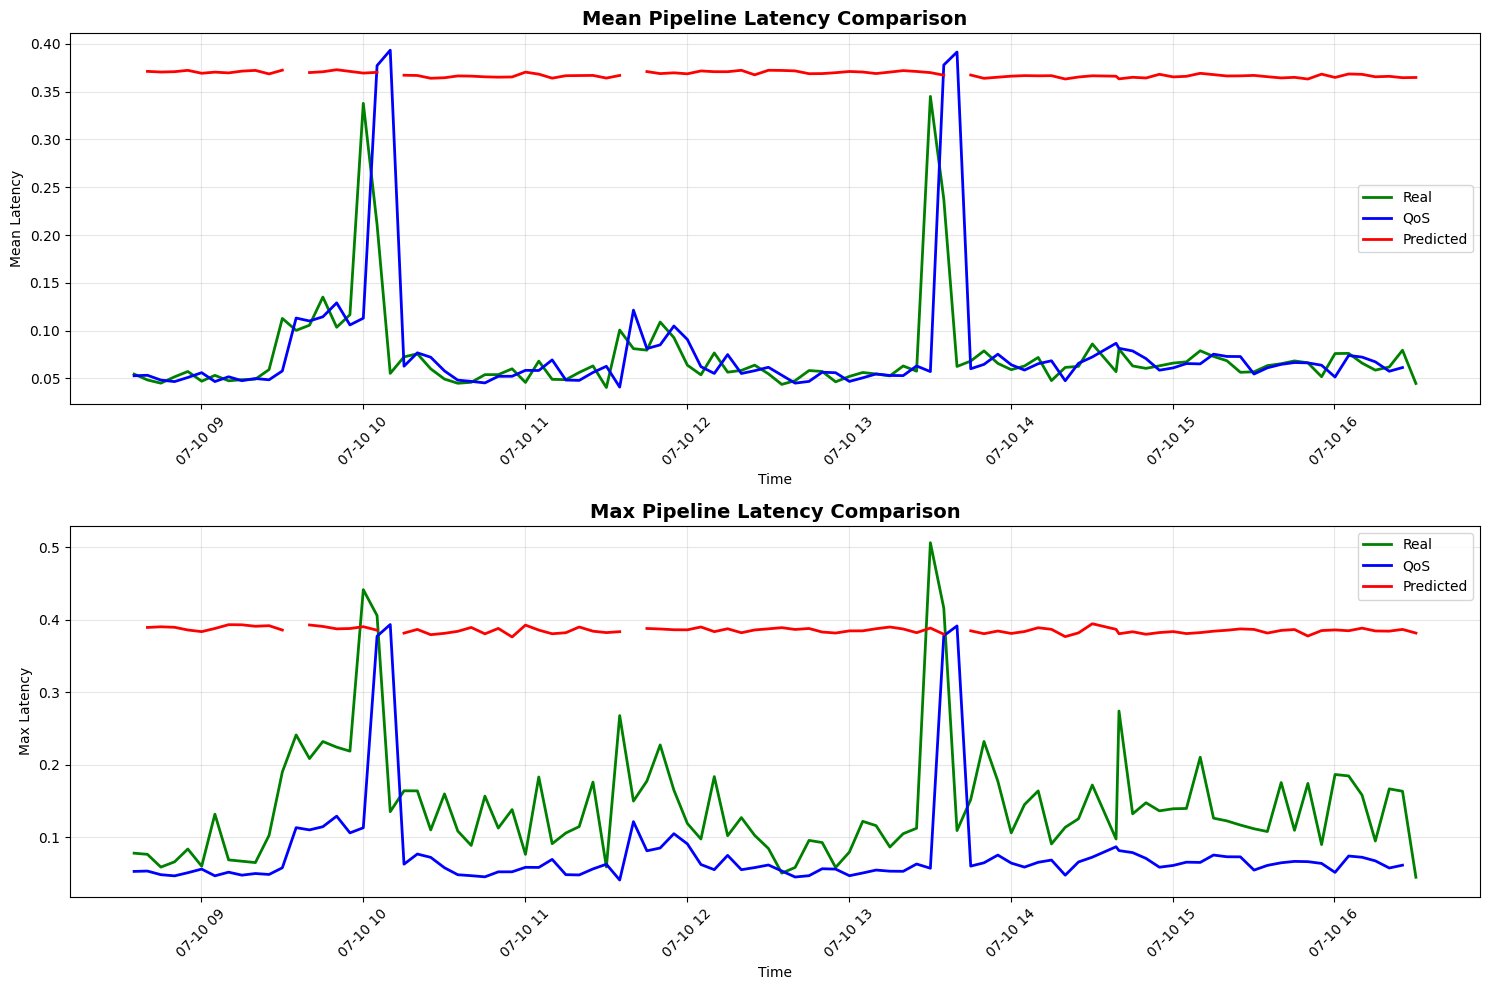

In [18]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_metrics_comparison(df_results_final):
    """
    Plot mean and max metrics comparing real, qos, and predicted values.
    
    Parameters:
    - df_results_final: DataFrame with all metrics columns
    """
    
    # Ensure start_time is datetime
    df_results_final['start_time'] = pd.to_datetime(df_results_final['start_time'])
    
    # Create figure with 2 subplots
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 10))
    
    # Plot 1: Mean values
    ax1.plot(df_results_final['start_time'], 
             df_results_final['real_future_values_5_min_mean'], 
             label='Real', linewidth=2, color='green')
    
    ax1.plot(df_results_final['start_time'], 
             df_results_final['qos_0'], 
             label='QoS', linewidth=2, color='blue')
    
    ax1.plot(df_results_final['start_time'], 
             df_results_final['mean_predicted'], 
             label='Predicted', linewidth=2, color='red')
    
    ax1.set_title('Mean Pipeline Latency Comparison', fontsize=14, fontweight='bold')
    ax1.set_xlabel('Time')
    ax1.set_ylabel('Mean Latency')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    ax1.tick_params(axis='x', rotation=45)
    
    # Plot 2: Max values
    ax2.plot(df_results_final['start_time'], 
             df_results_final['real_future_values_5_min_max'], 
             label='Real', linewidth=2, color='green')
    
    ax2.plot(df_results_final['start_time'], 
             df_results_final['qos_0'], 
             label='QoS', linewidth=2, color='blue')
    
    ax2.plot(df_results_final['start_time'], 
             df_results_final['max_predicted'], 
             label='Predicted', linewidth=2, color='red')
    
    ax2.set_title('Max Pipeline Latency Comparison', fontsize=14, fontweight='bold')
    ax2.set_xlabel('Time')
    ax2.set_ylabel('Max Latency')
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    ax2.tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.show()

# Usage:
plot_metrics_comparison(df_results_final)

Veiem que la predicció és terrible tot hi haver reentrenat el model.

Comprobem si és el model que no funciona bé o si és el modul de predict que he creat per evaluar el model on production.
- Per a fer això el que fem eś analitzar els resultats de les dades de test, on tenim els valors predicted vs true.
- Allà veiem que efectivament, el model funciona millor del que mostren les imatges superiors, haventhi variabilitat i una predicció prou precisa.

**Per tant, això confirma que el problema està en el nostre modul de predict**

In [23]:
results_input=np.load("/home/jolivera/Documents/CloudSkin/Time-Series-Library/results/long_term_forecast_custom_Informer_custom_ftMS_sl10_ll5_pl10_dm256_nh8_el2_dl1_df512_expand2_dc4_fc3_ebtimeF_dtTrue_Exp_0/input.npy")
results_pred=np.load("/home/jolivera/Documents/CloudSkin/Time-Series-Library/results/long_term_forecast_custom_Informer_custom_ftMS_sl10_ll5_pl10_dm256_nh8_el2_dl1_df512_expand2_dc4_fc3_ebtimeF_dtTrue_Exp_0/pred.npy")
results_true=np.load("/home/jolivera/Documents/CloudSkin/Time-Series-Library/results/long_term_forecast_custom_Informer_custom_ftMS_sl10_ll5_pl10_dm256_nh8_el2_dl1_df512_expand2_dc4_fc3_ebtimeF_dtTrue_Exp_0/true.npy")

In [29]:
results_input[1000]

array([[ 1.        ,  0.        ,  0.22871645, -0.5050828 ,  0.29986697,
         0.91580945,  0.15088448, -0.0197928 , -0.38260835, -0.5906815 ],
       [ 1.        ,  0.        ,  0.22480726, -0.51743114,  0.27189806,
         0.8877739 ,  0.16319835, -0.02068944, -0.38260835, -0.3571351 ],
       [ 1.        ,  0.        ,  0.2253891 , -0.49876568,  0.31027964,
         0.88374186,  0.23860015, -0.00908443, -0.38260835,  0.03903916],
       [ 1.        ,  0.        ,  0.22651492, -0.5058453 ,  0.35459402,
         0.88002896,  0.20573168, -0.01750264, -0.38260835, -0.63960004],
       [ 1.        ,  0.        ,  0.22362569, -0.5050613 ,  0.2366645 ,
         0.9294578 ,  0.16948622, -0.01586354, -0.38260835, -0.27354506],
       [ 1.        ,  0.        ,  0.2226244 , -0.5034331 ,  0.3197237 ,
         0.9452168 ,  0.2067143 , -0.02163749, -0.38260835, -0.6686286 ],
       [ 1.        ,  0.        ,  0.21993877, -0.49765348,  0.26184863,
         0.8723735 ,  0.18351805, -0.01644608

In [33]:
print(results_pred[1000],"\n")
print(results_true[1000])

[[0.14339988]
 [0.12472947]
 [0.12118594]
 [0.13170956]
 [0.15174586]
 [0.15543196]
 [0.20764484]
 [0.18572947]
 [0.16240577]
 [0.20985597]] 

[[0.06239271]
 [0.182844  ]
 [0.1509707 ]
 [0.10391752]
 [0.059757  ]
 [0.0586168 ]
 [0.0480175 ]
 [0.20508234]
 [0.10134069]
 [0.05174223]]
